In [18]:
%pip install httpx
%pip install pandas
%pip install scipy
%pip install matplotlib
%pip install environs

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import io
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.spatial import transform as scipy_transform

In [33]:
import os

import httpx
import environs

env = environs.Env()
env.read_env(".env", override=True)

class Clickhouse:
    credentials = {
        "user": env.str('CLICKHOUSE_USER'),
        "password": env.str('CLICKHOUSE_PASSWORD'),
    }
    url = env.str('CLICKHOUSE_URL')

    def __init__(self):
        self._httpx_client = httpx.Client()

    def post(
        self,
        query: str,
        headers: dict = None,
        content: bytes = None,
    ) -> str:
        response = self._httpx_client.post(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
            content=content,
        )
        return response.text

    def get(
        self,
        query: str,
        headers: dict = None,
    ) -> str:
        response = self._httpx_client.get(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
        )
        return response.text


http://staging-api.sensorehab.com:8123


In [34]:
ch = Clickhouse()
pos_csv_str = ch.get('SELECT * FROM raw_data FORMAT CSV')

In [35]:
df = pd.read_csv(
    io.StringIO(pos_csv_str),
    names=[
        'game_result_id', 'game_id', 'patient_id', 'timestamp', 'src', 'side',
        'h_rssi', 'h_gain', 'g_rssi', 'g_gain', 'forearm_quat_x',
        'forearm_quat_y', 'forearm_quat_z', 'forearm_quat_w', 'forearm_lia_x',
        'forearm_lia_y', 'forearm_lia_z', 'forearm_grv_x', 'forearm_grv_y',
        'forearm_grv_z', 'shoulder_quat_x', 'shoulder_quat_y',
        'shoulder_quat_z', 'shoulder_quat_w', 'shoulder_lia_x',
        'shoulder_lia_y', 'shoulder_lia_z', 'shoulder_grv_x', 'shoulder_grv_y',
        'shoulder_grv_z', 'position_type'
    ],
)
df.head(10)

,game_result_id,game_id,patient_id,timestamp,src,side,h_rssi,h_gain,g_rssi,g_gain,...,shoulder_quat_y,shoulder_quat_z,shoulder_quat_w,shoulder_lia_x,shoulder_lia_y,shoulder_lia_z,shoulder_grv_x,shoulder_grv_y,shoulder_grv_z,position_type
0,100424,12,291,2022-06-30 06:33:27.179,a4:34:f1:28:44:0d,2,-50,15,-48,15,...,0.120178,0.038337,0.211419,0.098,-0.071,-0.083,-8.257,2.678,-4.390,0
1,100424,12,291,2022-06-30 06:33:27.183,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.120125,0.038293,0.211424,0.097,-0.070,-0.083,-8.258,2.678,-4.390,0
2,100424,12,291,2022-06-30 06:33:27.192,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119619,0.038061,0.213989,0.187,-0.067,-0.055,-8.312,2.590,-4.405,0
3,100424,12,291,2022-06-30 06:33:27.204,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119619,0.038061,0.213989,0.187,-0.067,-0.055,-8.312,2.590,-4.405,0
4,100424,12,291,2022-06-30 06:33:27.279,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119619,0.038061,0.213989,0.187,-0.067,-0.055,-8.312,2.590,-4.405,0
5,100424,12,291,2022-06-30 06:33:27.286,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119619,0.038061,0.213989,0.187,-0.067,-0.055,-8.312,2.590,-4.405,0
6,100424,12,291,2022-06-30 06:33:27.317,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119571,0.037954,0.214002,0.185,-0.066,-0.055,-8.312,2.590,-4.405,0
7,100424,12,291,2022-06-30 06:33:27.322,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119571,0.037954,0.214002,0.185,-0.066,-0.055,-8.312,2.590,-4.405,0
8,100424,12,291,2022-06-30 06:33:27.332,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119242,0.037247,0.214087,0.171,-0.062,-0.052,-8.315,2.590,-4.405,0
9,100424,12,291,2022-06-30 06:33:27.347,a4:34:f1:28:44:0d,2,-50,15,-49,15,...,0.119197,0.037150,0.214099,0.169,-0.061,-0.052,-8.315,2.590,-4.405,0


In [16]:
df.loc[df['game_result_id'] == 100444].reset_index().to_csv('data/senso_raw_data_sample.csv')

In [6]:
sample_quat = df[[
    'forearm_quat_x', 'forearm_quat_y', 'forearm_quat_z', 'forearm_quat_w'
]].loc[0]
sample_quat

forearm_quat_x    0.976529
forearm_quat_y    0.084105
forearm_quat_z   -0.197743
forearm_quat_w    0.014681
Name: 0, dtype: float64

In [7]:
rotation = scipy_transform.Rotation.from_quat(sample_quat.to_list())
forearm_vec = rotation.as_rotvec()
unit_y_vector = np.array([0, 1, 0])
forearm_vec, unit_y_vector

(array([ 3.03950948,  0.26178224, -0.61548784]), array([0, 1, 0]))

In [8]:
rotation.apply([0, 0, 1])

array([-0.38373392, -0.06193517, -0.92136438])

In [9]:
dot_product = np.dot(forearm_vec / np.linalg.norm(forearm_vec),
                     unit_y_vector / np.linalg.norm(unit_y_vector))
rad_angle = np.arccos(dot_product)
deg_angle = math.cos(math.degrees(rad_angle))
rad_angle, deg_angle

(1.486582772976006, -0.9387136033490211)

In [10]:
df[['forearm_quat_x', 'forearm_quat_y', 'forearm_quat_z', 'forearm_quat_w']]

,forearm_quat_x,forearm_quat_y,forearm_quat_z,forearm_quat_w
0,0.976529,0.084105,-0.197743,0.014681
1,0.976513,0.084146,-0.197790,0.014856
2,0.976313,0.084694,-0.198366,0.017027
3,0.976313,0.084694,-0.198366,0.017027
4,0.976313,0.084694,-0.198366,0.017027
...,...,...,...,...
129284,0.804758,-0.402527,-0.030964,0.435176
129285,0.804797,-0.402322,-0.031144,0.435280
129286,0.804847,-0.402103,-0.031343,0.435377
129287,0.804772,-0.402099,-0.031542,0.435504


In [11]:
def calc_ang2(row):
    rotation = scipy_transform.Rotation.from_quat(row.to_list())
    vec = rotation.apply([0, 1, 0])
    unit_vec = np.array([0, 0, -1])
    dot_product = np.dot(vec / np.linalg.norm(vec),
                         unit_vec / np.linalg.norm(unit_vec))
    rad_angle = np.arccos(dot_product)
    deg_angle = math.degrees(rad_angle)
    return deg_angle

In [12]:
forearm_quat = [
    'forearm_quat_x', 
    'forearm_quat_y', 
    'forearm_quat_z', 
    'forearm_quat_w',
]
df['forearm_y_ang'] = df[forearm_quat].apply(calc_ang2, axis=1)
df['forearm_y_ang'].head(10)

0    89.737040
1    89.755213
2    89.979748
3    89.979748
4    89.979748
5    89.979748
6    89.998108
7    89.998108
8    90.090649
9    90.074806
Name: forearm_y_ang, dtype: float64

<AxesSubplot:>

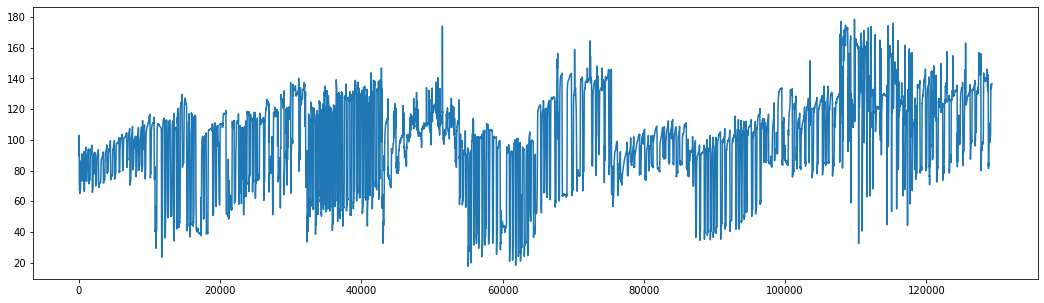

In [13]:
df['forearm_y_ang'].plot(figsize=(18, 5))

In [14]:
shoulder_quat = [
    'shoulder_quat_x',
    'shoulder_quat_y',
    'shoulder_quat_z',
    'shoulder_quat_w',
]
df['shoulder_y_ang'] = df[shoulder_quat].apply(calc_ang2, axis=1)
df['shoulder_y_ang'].head(10)

0    114.773872
1    114.773758
2    115.068643
3    115.068643
4    115.068643
5    115.068643
6    115.068589
7    115.068589
8    115.068099
9    115.068065
Name: shoulder_y_ang, dtype: float64

<AxesSubplot:>

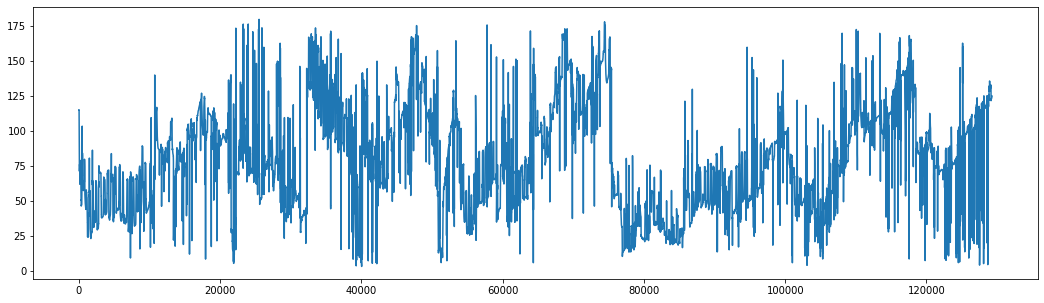

In [15]:
df['shoulder_y_ang'].plot(figsize=(18, 5))

In [16]:
df['patient_id'].unique()

array([291, 292, 290, 293])

In [17]:
df['game_result_id'].unique()

array([100424, 100449, 100444, 100450, 100445, 100451, 100446, 100452,
       100447, 100453, 100448, 100454])

<AxesSubplot:>

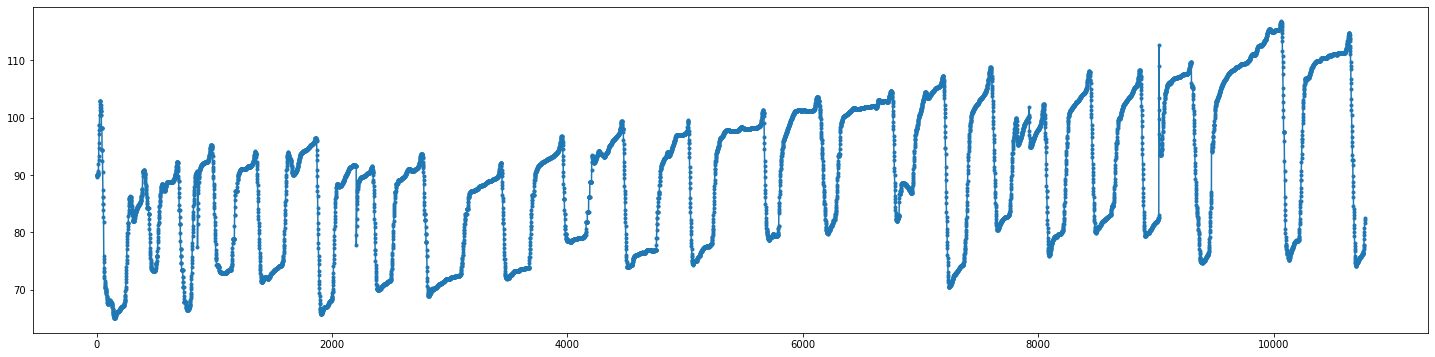

In [18]:
df.loc[df['game_result_id'] == 100424]['forearm_y_ang'].plot(
    figsize=(25, 6),
    style='.-',
)

In [19]:
def plot_game_sessions(patient_id):
    patient_df = df.loc[df['patient_id'] == patient_id]
    result_ids = patient_df['game_result_id'].unique()
    print(result_ids)

    for result_id in result_ids:
        defprops = {
            'xdata': [],
            'ydata': [],
            'linestyle': 'None',
            'markersize': 10
        }
        black_arrow = mlines.Line2D(
            **defprops,
            marker='^',
            color='black',
            label='start position',
        )
        red_arrow = mlines.Line2D(
            **defprops,
            marker='v',
            color='red',
            label='end position',
        )
        plt.legend(handles=[black_arrow, red_arrow])

        result_df = df.loc[df['game_result_id'] == result_id].reset_index()
        # 'ArrowDown' positionType = 1;
        start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
        # 'ArrowUp' positionType = 2;
        end_mark_locs = result_df.loc[result_df['position_type'] == 2].index

        result_df['forearm_y_ang'].plot(
            title=f'patient {patient_id}, result {result_id}',
            figsize=(25, 6),
            color='tab:blue',
            marker='^',
            markersize=10,
            markerfacecolor='black',
            markevery=start_mark_locs,
        )
        result_df['forearm_y_ang'].plot(
            figsize=(25, 6),
            color='tab:blue',
            marker='v',
            markersize=10,
            markerfacecolor='red',
            markevery=end_mark_locs,
        )
        plt.figure()


[100444 100450 100445]


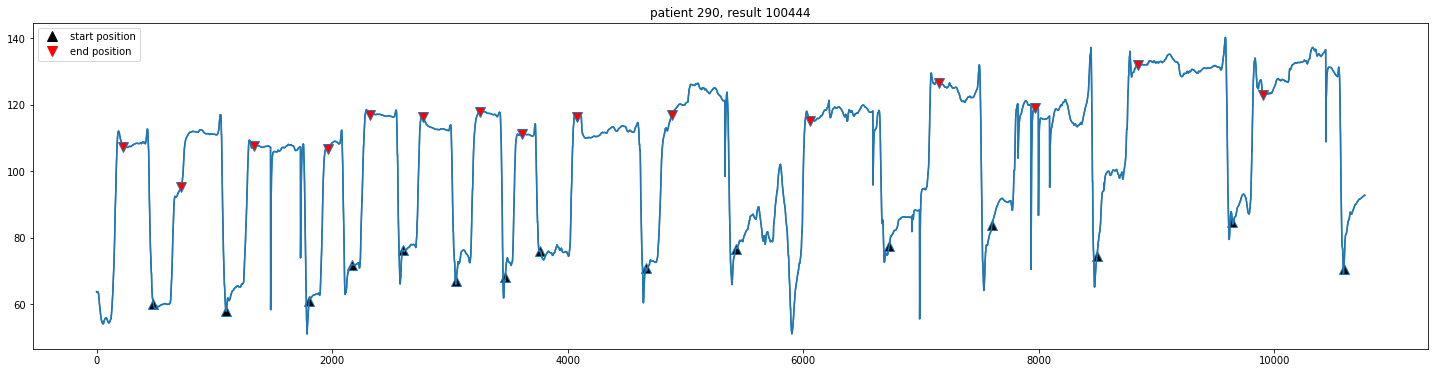

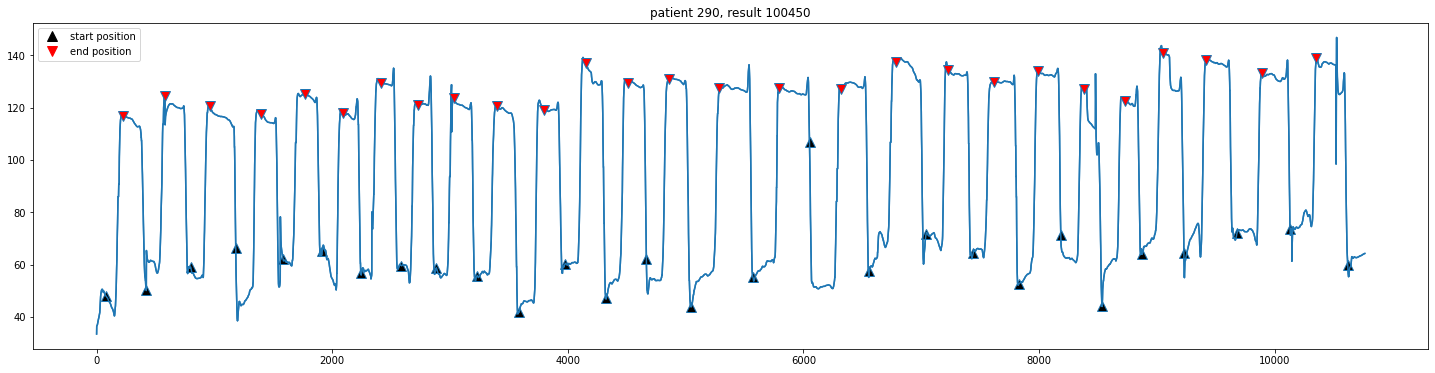

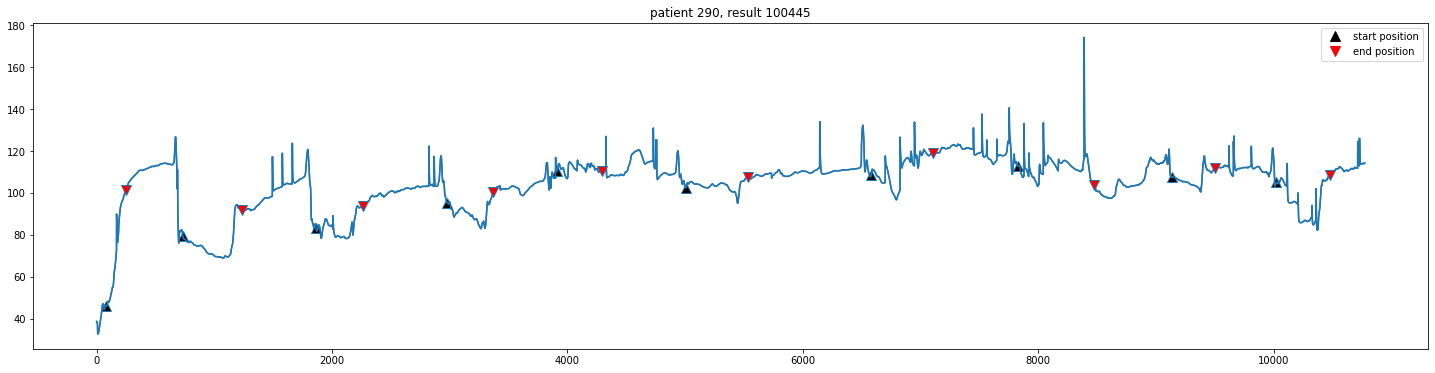

<Figure size 432x288 with 0 Axes>

In [20]:
plot_game_sessions(patient_id=290)

[100424 100451 100447]


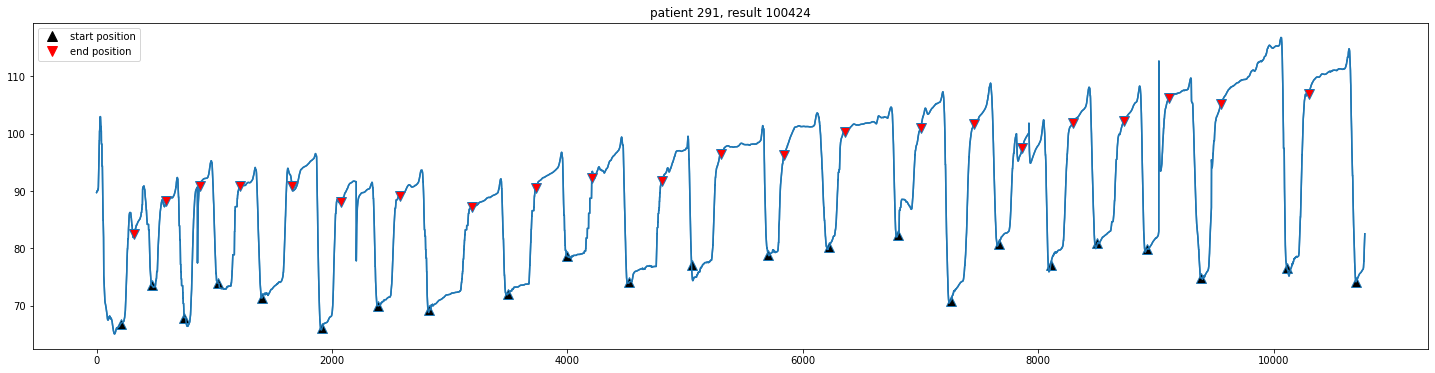

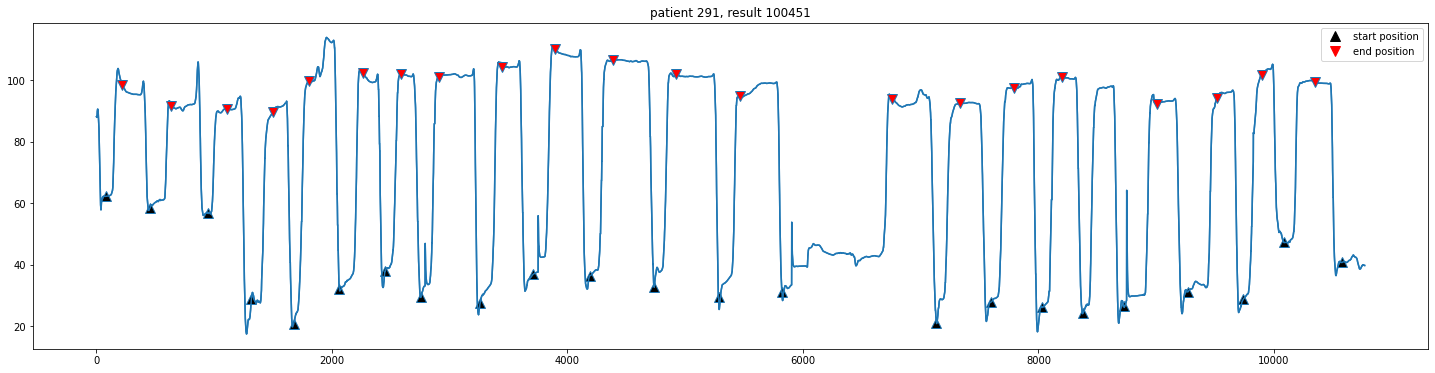

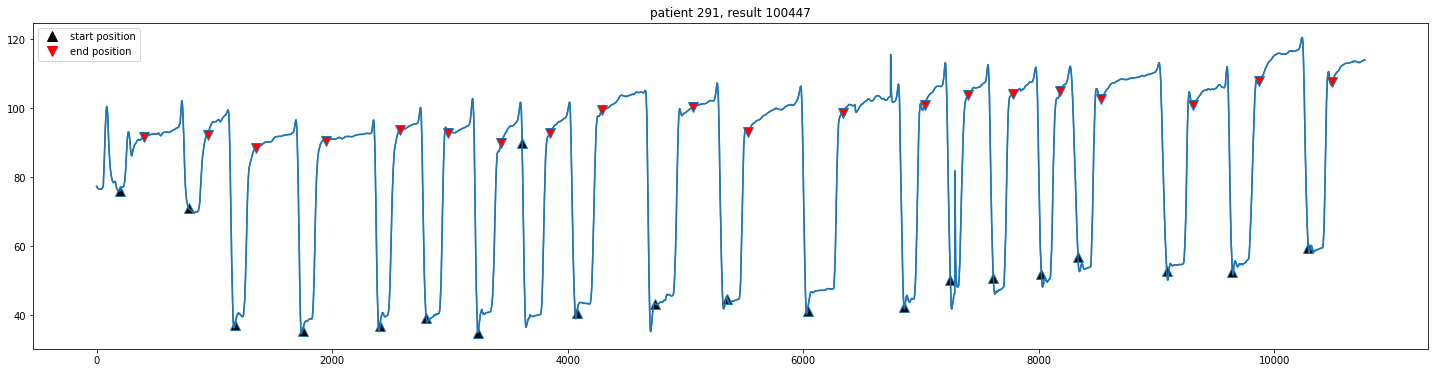

<Figure size 432x288 with 0 Axes>

In [21]:
plot_game_sessions(patient_id=291)

[100449 100446 100448]


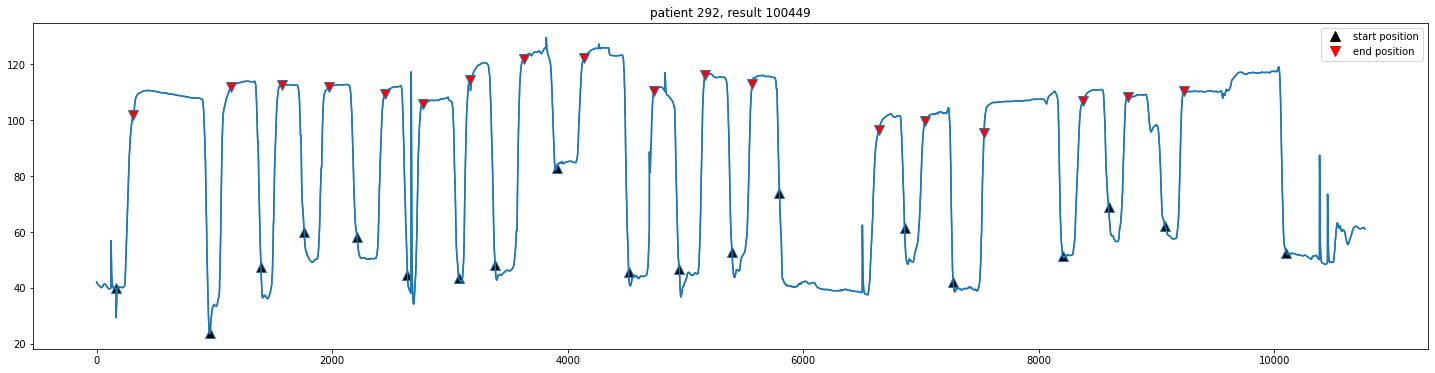

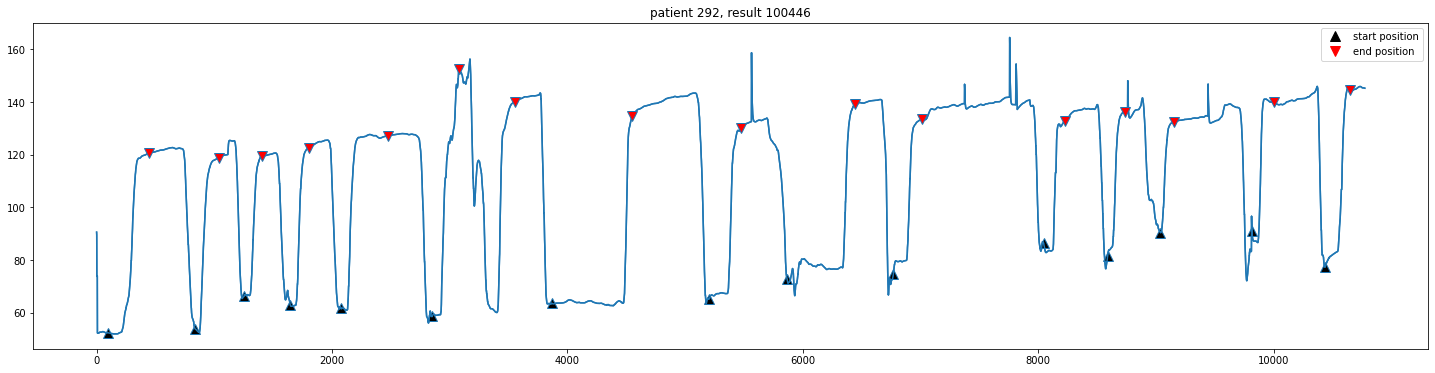

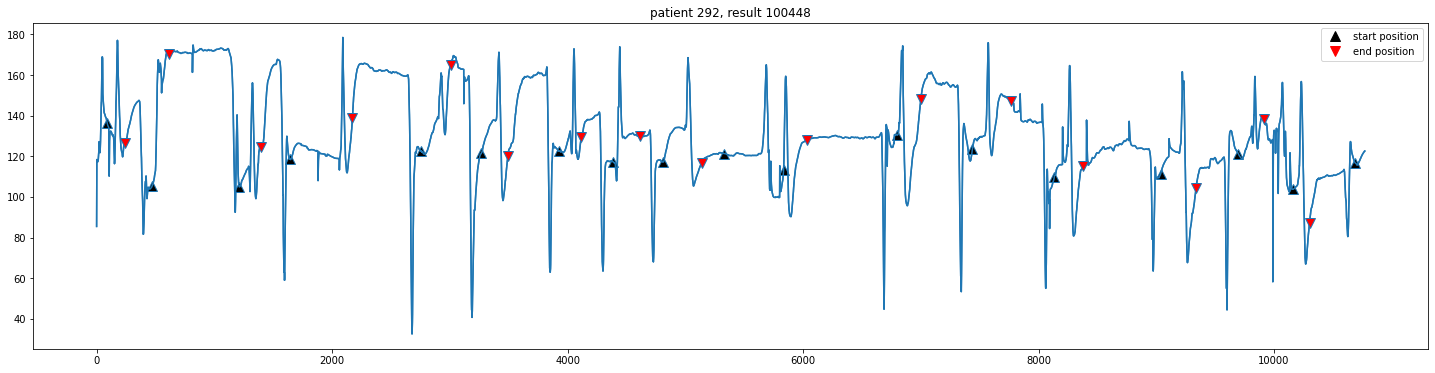

<Figure size 432x288 with 0 Axes>

In [22]:
plot_game_sessions(patient_id=292)

[100452 100453 100454]


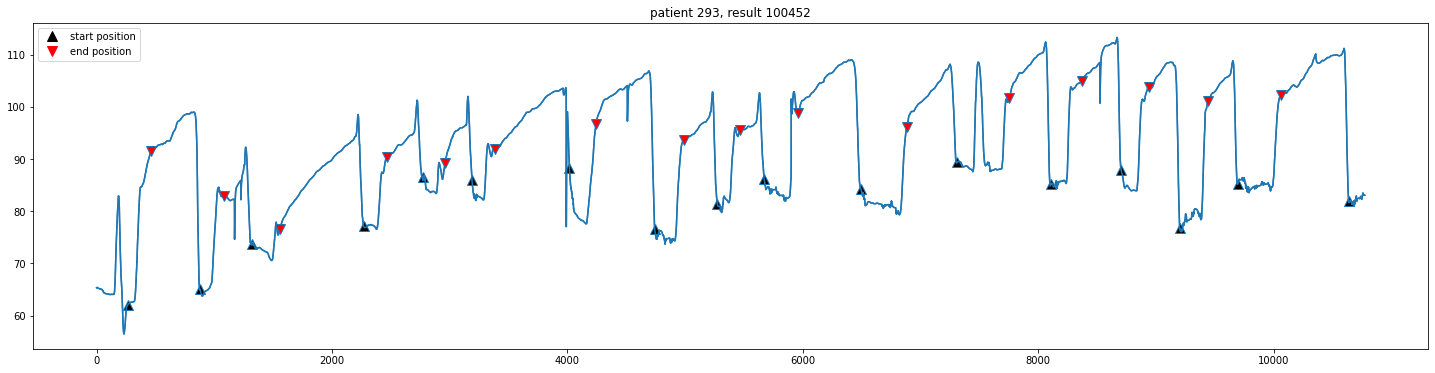

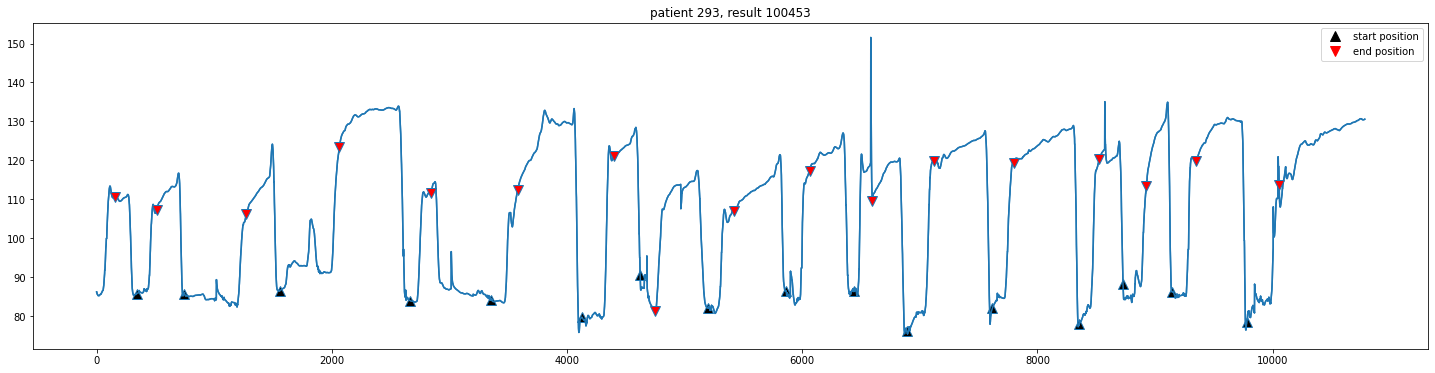

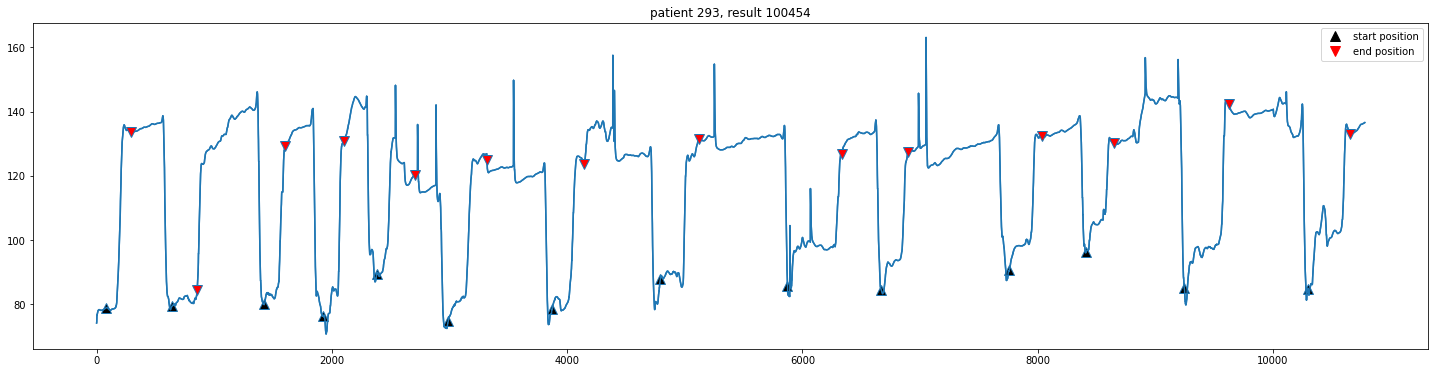

<Figure size 432x288 with 0 Axes>

In [23]:
plot_game_sessions(patient_id=293)

# Discover other data

<AxesSubplot:>

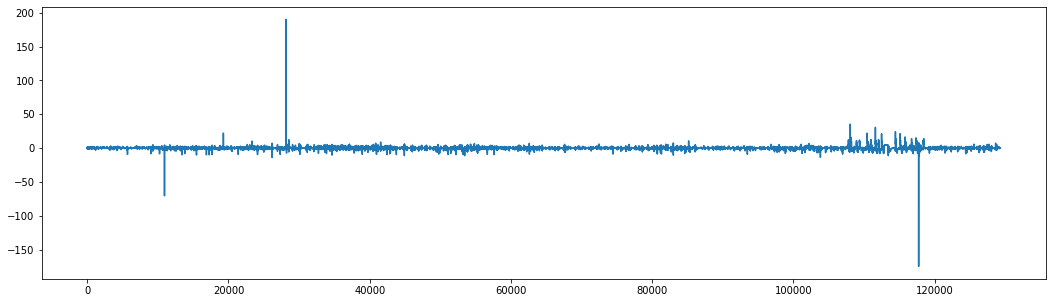

In [24]:
df['forearm_lia_x'].plot(figsize=(18, 5))

<AxesSubplot:>

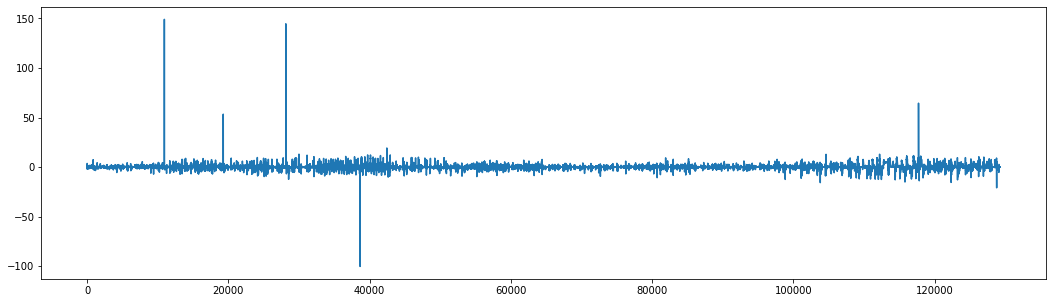

In [25]:
df['forearm_lia_y'].plot(figsize=(18, 5))

<AxesSubplot:>

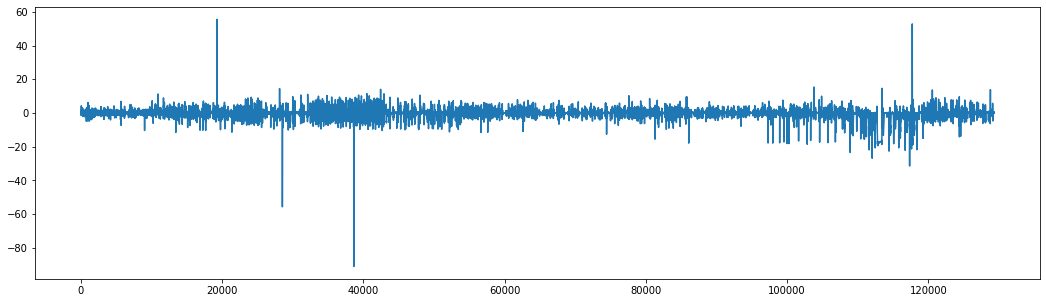

In [26]:
df['forearm_lia_z'].plot(figsize=(18, 5))